In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('weight-height.csv')
df.sample(4)

,Gender,Height,Weight
2180,Male,70.351998,187.820473
2658,Male,72.731788,213.683943
8707,Female,60.678978,120.618535
6958,Female,62.396094,121.512780


In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [6]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

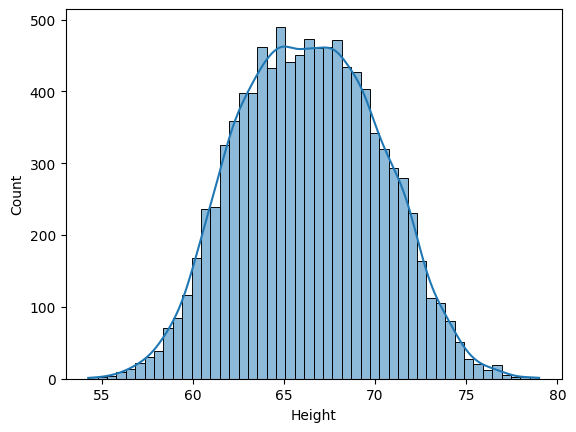

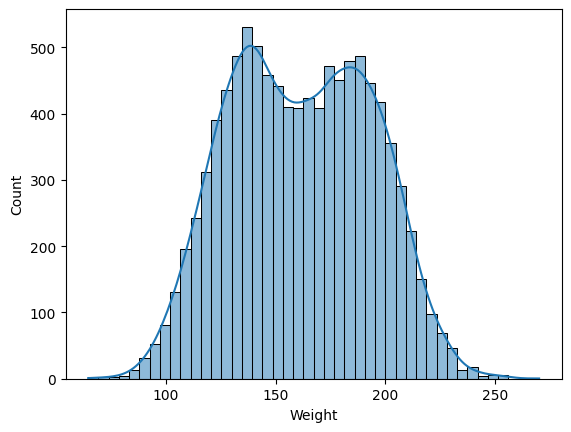

In [7]:
for i in df.select_dtypes(include='number'):
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

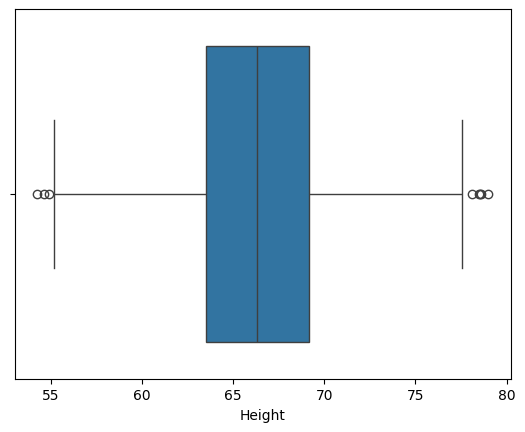

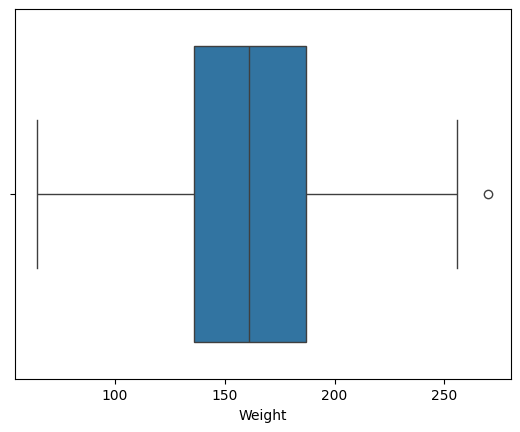

In [8]:
for i in df.select_dtypes(include='number'):
    sns.boxplot(data=df,x=i)
    plt.show()

In [9]:
df.shape

(10000, 3)

In [10]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [12]:
upper_limit=df['Height'].quantile(.99)
lower_limit=df['Height'].quantile(.01)


In [14]:
upper_limit

74.7857900583366

In [15]:
lower_limit

58.13441158671655

In [19]:
new_df=df[(df['Height']<=74.78)&(df['Height']>=58.13)]

In [20]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


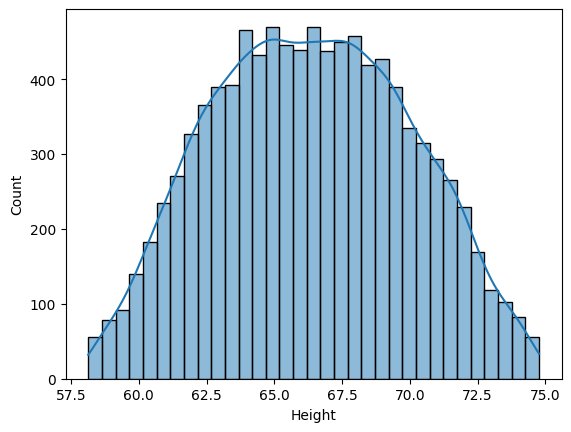

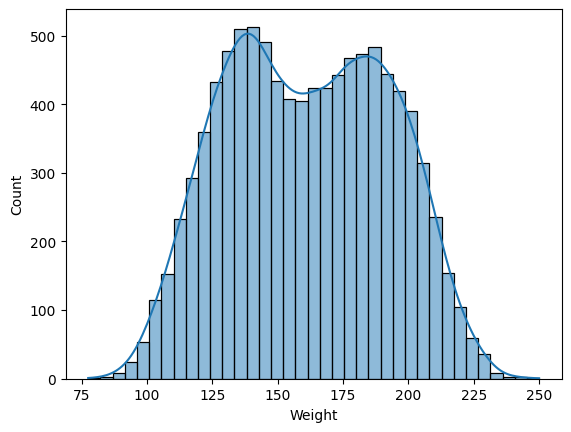

In [21]:
for i in new_df.select_dtypes(include='number'):
    sns.histplot(data=new_df,x=i,kde=True)
    plt.show()

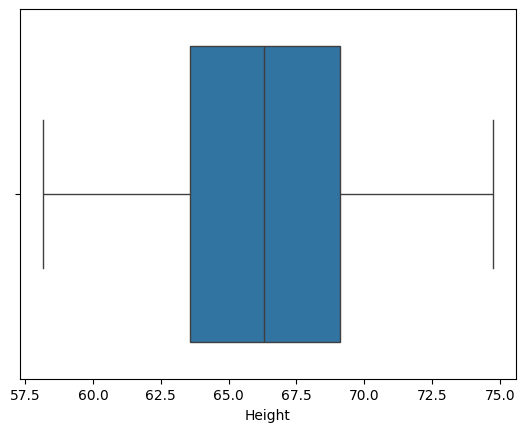

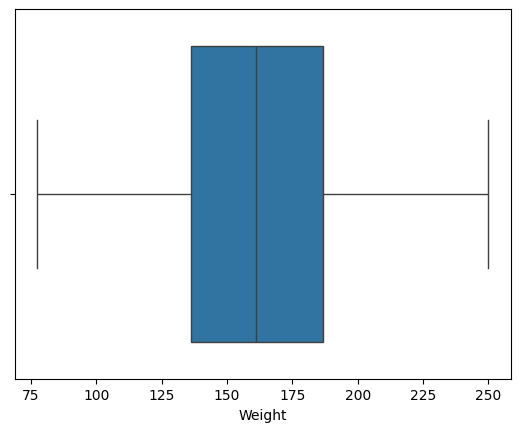

In [22]:
for i in new_df.select_dtypes(include='number'):
    sns.boxplot(data=new_df,x=i)
    plt.show()

In [23]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [24]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

Winsorization (Capping)

In [27]:
df['Height']=np.where(df['Height']>=upper_limit,
                 upper_limit,
                 np.where(df['Height']<=lower_limit,
                          lower_limit,
                          df['Height']
                         )
                )

In [28]:
df.shape

(10000, 3)

In [29]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

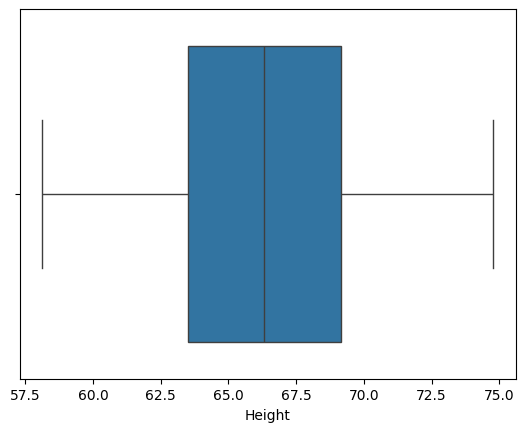

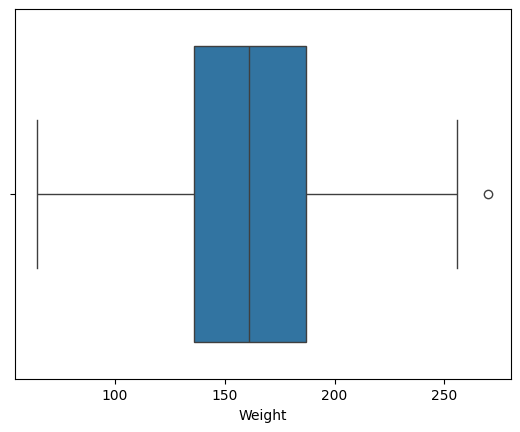

In [31]:
for i in df.select_dtypes(include='number'):
    sns.boxplot(data=df,x=i)
    plt.show()

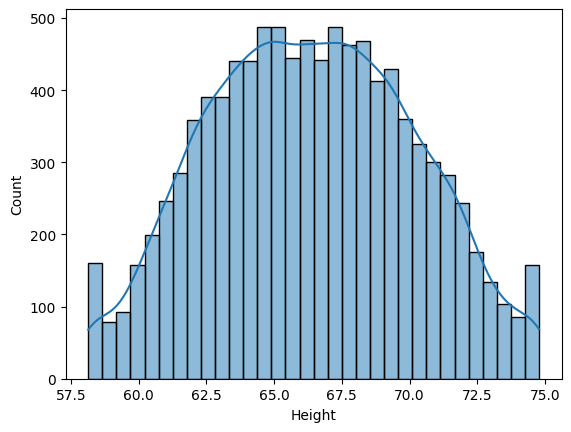

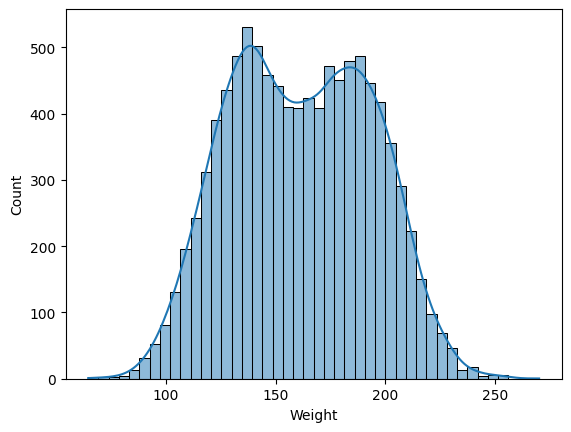

In [32]:
for i in df.select_dtypes(include='number'):
    sns.histplot(data=df,x=i,kde=True)
    plt.show()